In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
data=np.loadtxt("ex2data1.txt",delimiter=",")
X=data[:,[0,1]]
y=data[:,2]
y=y.reshape((100,1))

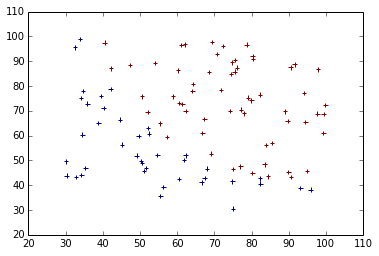

In [76]:
#plotting the data

plt.scatter(X[:,0],X[:,1],c=y,marker="+")

In [77]:
def sigmoid(z):
    final=1./(1+np.exp(-z))
    return final

print sigmoid(np.array([-10,0,10]))

[  4.539787e-05   5.000000e-01   9.999546e-01]


In [3]:
#adding an extra columns of ones

def prepare_data():
    
    data=np.loadtxt("ex2data1.txt",delimiter=",")
    X=data[:,[0,1]]
    y=data[:,2]
    y=y.reshape((100,1))
    
    m=X.shape[0]
    n=X.shape[1]+1  # +1 for the extra intercept column

    X=np.hstack((np.ones((m,1)),X))
    return X,y


X,y=prepare_data()

init_theta=np.zeros(3,dtype="float")  #the init theta for the fmin in optmize has to be a 1D array
def costFunction(theta,X,y,lmbda=0):
    ''' X is m x n
    theta is (n,)
    y is m x 1
    '''
    
    #lmbda=0
    
    m=X.shape[0]
    
    theta=theta.reshape((3,1))
    hx=np.dot(X,theta)
    hx=sigmoid(hx)
    cost=np.sum((-y*np.log(hx) - (1-y)*np.log(1-hx)),axis=0)
    cost=(1./m) * cost
    regularization_term=((lmbda)/2*m)*np.sum(np.square(theta[1:]))
    return cost+regularization_term



def gradient(theta,X,y):
    theta=theta.reshape((3,1))
    hx=np.dot(X,theta)
    grad=np.mean(((sigmoid(hx)-y)*X),axis=0)
    return grad
    


print costFunction(init_theta,X,y)

print init_theta.shape

print gradient(init_theta,X,y)




NameError: global name 'sigmoid' is not defined

In [4]:
def prediction(theta,X):
    ''' here theta is (2,)'''
    
    ''' X is N x 2'''
    
    theta=np.transpose(np.asmatrix(theta))   #theta is (2 x 1)
    
    pred=sigmoid(np.dot(X,theta))
    
    #return 1 if pred>=0.5 else 0
    
    pred=np.array(pred>0.5,dtype='int64')
    return pred


#finding the minimum value of theta
lmbda=np.matrix(np.array([0]))

final_theta=scipy.optimize.fmin(costFunction,x0=init_theta,args=(X,y),maxiter=500)

print final_theta

pred=prediction(final_theta,X)



#the optimize.fmin function takes the intital theta as a 1D numpy array so i ahve passed the initial theta as (3,)
#now since it is a 1D array hence i am reshaping the theta inside the cost function.

#The X and Y for the optimize function is a 2D array 

#without the intercept term i was getting an incorrect answer all the predictions were 1 hence the intercept in the 
#logit regression is paramount.


#the costfunction should return a single value not an arary of value. hence i am doing np.mean() for the cost function

#also the cost function should take the argument in the order of theta,X,y for the fmin to work properly
    

NameError: name 'scipy' is not defined

Now i can write the gradient descent update rule for this optimisation problem but in a lot of optimisation problem the optimisation to be carried is quite complicated. Scipy and numpy have optimsation routine built in them using these routine i can find the minima of the function.

In [132]:
pred=prediction(final_theta,X)

The Elements of Statistical Learning by Hastie et al. define ridge regression as follows (Section 3.4.1, equation 3.41):
β̂ ridge=argminβ{∑i=1N(yi−β0−∑j=1pxijβj)2+λ∑j=1pβ2j},
i.e. explicitly exclude the intercept term β0 from the ridge penalty.

Then they write:

[...] notice that the intercept β0 has been left out of the penalty term. Penalization of the intercept would make the procedure depend on the origin chosen for Y; that is, adding a constant c to each of the targets yi would not simply result in a shift of the predictions by the same amount c.
Indeed, in the presence of the intercept term, adding c to all yi will simply lead to β0 increasing by c as well and correspondingly all predicted values ŷ i will also increase by c. This is not true if the intercept is penalized: β0 will have to increase by less than c.

In [143]:
np.random.seed(2)


array([[ 0.025926],
       [ 0.549662]])